In [75]:
from configs import merged_cycle_data_file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np

one_day_secs = 24 * 60 * 60 # 1 day in seconds
def print_hist_labels(hist):
    for p in hist.patches:
        y_value = p.get_height()
        x_value = p.get_x() + p.get_width() / 2

        label = y_value
        hist.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, 10),             # Horizontally shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            va='top',                   # Vertically center label
            ha='center')

In [76]:
import os
output = 'analysis.csv'
if not os.path.isfile(output):
    print(f'{output} file not found')
    p = 0.01  # 1% of the lines
    init_df = df = pd.read_csv(
        merged_cycle_data_file,
        index_col='Rental Id',
        parse_dates=['End Date', 'Start Date'],
        header=0,
        skiprows=lambda i: i>0 and random.random() > p)
    df.to_csv(output)
else:
    print(f'Found file {output}')
    init_df = df = pd.read_csv(
        output,
        index_col='Rental Id',
        parse_dates=['End Date', 'Start Date']
    )

Found file analysis.csv


In [77]:
print('Old size:', len(df))
df = df.dropna()
print('New size:', len(df))

Old size: 475610
New size: 473857


In [78]:
df['EndStation Id'] = df['EndStation Id'].map(int)
df.dtypes

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Duration                  float64
End Date           datetime64[ns]
EndStation Id               int64
Start Date         datetime64[ns]
StartStation Id             int64
dtype: object

In [79]:
df.head()

,Duration,End Date,EndStation Id,Start Date,StartStation Id
Rental Id,,,,,
50754320,300.0,2016-10-01 00:40:00,202,2016-10-01 00:35:00,451
50754619,1560.0,2016-10-01 02:30:00,531,2016-10-01 02:04:00,341
50754649,1560.0,2016-10-01 02:42:00,440,2016-10-01 02:16:00,233
50754653,480.0,2016-10-01 02:26:00,479,2016-10-01 02:18:00,58
50754904,540.0,2016-10-01 05:04:00,121,2016-10-01 04:55:00,318


In [80]:
df.describe()

,Duration,EndStation Id,StartStation Id
count,4.738570e+05,473857.000000,473857.000000
mean,1.265932e+03,1139.987958,763.703704
std,7.466046e+03,13794.628211,9926.913292
min,-2.160000e+03,1.000000,1.000000
25%,4.800000e+02,157.000000,158.000000
50%,8.400000e+02,320.000000,324.000000
75%,1.260000e+03,556.000000,557.000000
max,1.815360e+06,300249.000000,300249.000000


Text(0.5, 1.0, 'Duration distribution')

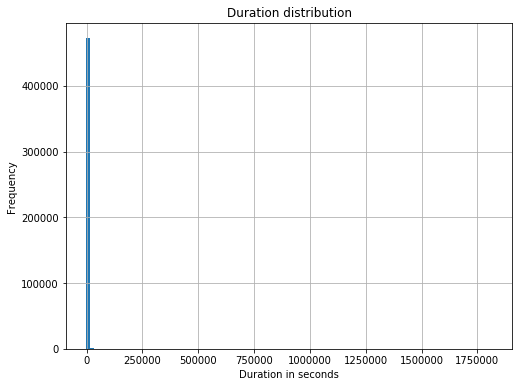

In [81]:
df['Duration'].hist(bins=100, figsize=(8,6))
# it looks like we have some outliers
plt.xlabel('Duration in seconds')
plt.ylabel('Frequency')
plt.title('Duration distribution')

In [82]:
len(df[(df['Duration'] > one_day_secs) | (df['Duration'] < 0)])

148

In [83]:
# there are rows where the 'Duration' value does not match the difference between 'End Date' and 'Start Date'
# also, there are rows where 'Start Date' is after 'End Date'
diff = df['End Date'] - df['Start Date']
seconds = diff.map(lambda x: x.total_seconds())
df = df[(df['Duration'] == seconds) & (seconds >= 0)]

Text(0.5, 1.0, 'Duration distribution')

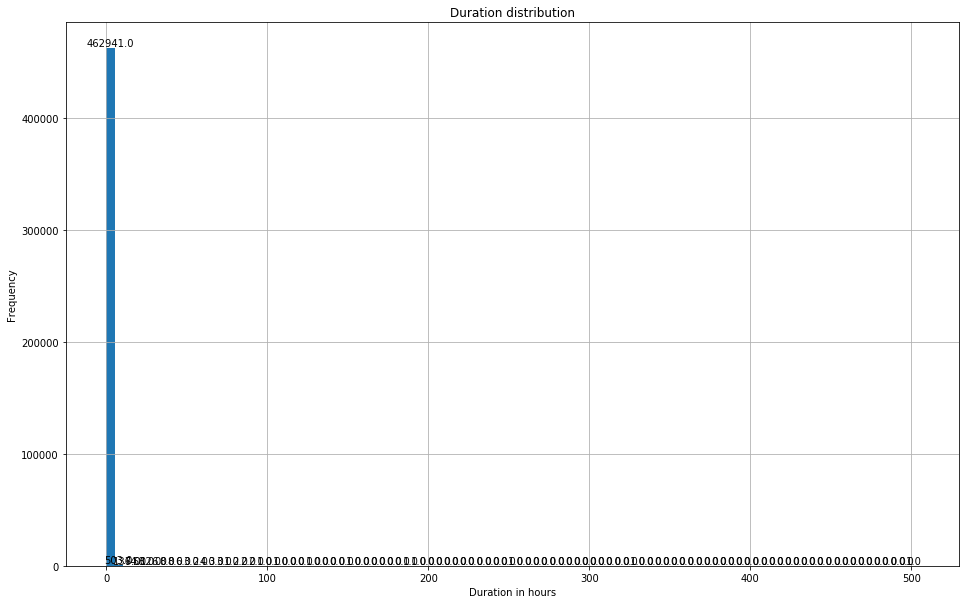

In [84]:
hist = df['Duration'].map(lambda x: x / 3600).hist(bins=100, figsize=(16,10))
print_hist_labels(hist)
plt.xlabel('Duration in hours')
plt.ylabel('Frequency')
plt.title('Duration distribution')

Text(0.5, 1.0, 'Duration distribution')

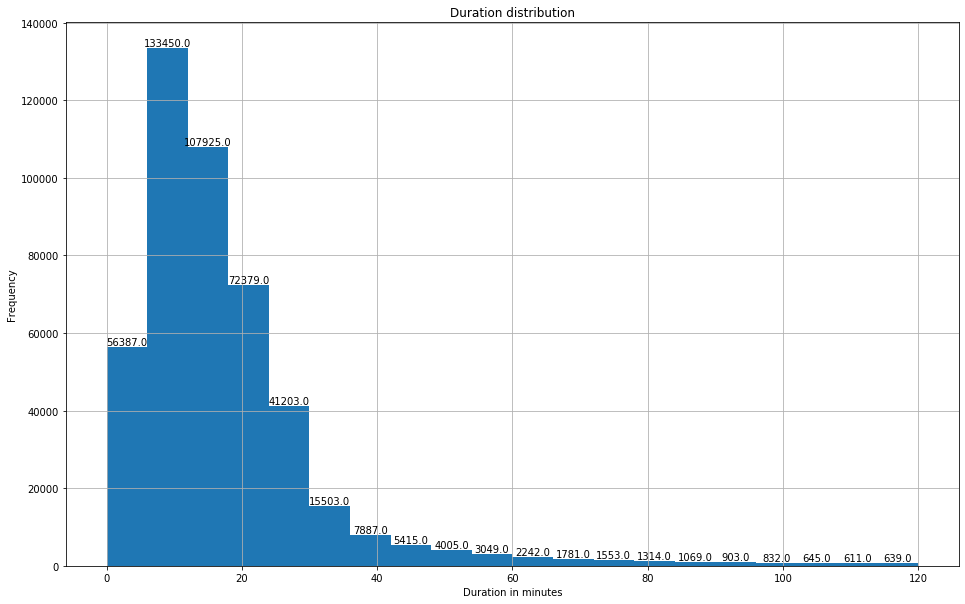

In [85]:
# leave only entries that are shorter than 2 hours and have valid duration
valid_df = df[(df['Duration'] >= 0) & (df['Duration'] <= 2 * 60 * 60)]
hist = valid_df['Duration'].map(lambda x: x / 60).hist(bins=20, figsize=(16,10))
print_hist_labels(hist)
df, valid_df = valid_df, None
plt.xlabel('Duration in minutes')
plt.ylabel('Frequency')
plt.title('Duration distribution')

In [86]:
df['month'] = df['Start Date'].apply(lambda t: t.month)
df['weekday'] = df['Start Date'].apply(lambda t: t.weekday())
df['hour'] = df['Start Date'].apply(lambda t: t.hour)

Text(0.5, 1.0, 'Hour Sample Distribution')

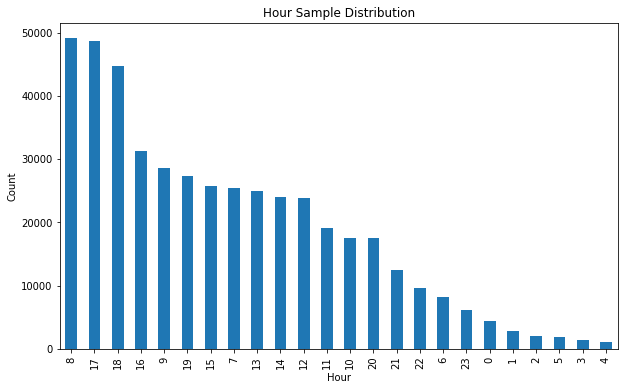

In [87]:
# how many shares per hour in total?
df['hour'].value_counts().plot(kind='bar', figsize=(10,6))
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Hour Sample Distribution')

Text(0.5, 1.0, 'Weekday Sample Distribution')

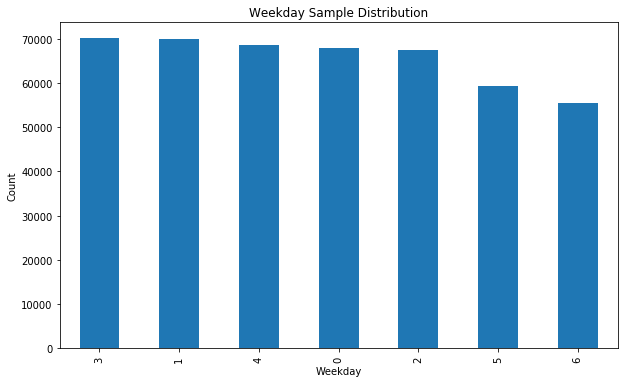

In [88]:
# how many shares per weekday in total?
df['weekday'].value_counts().plot(kind='bar', figsize=(10,6))
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.title('Weekday Sample Distribution')

Text(0.5, 1.0, 'Month Sample Distribution')

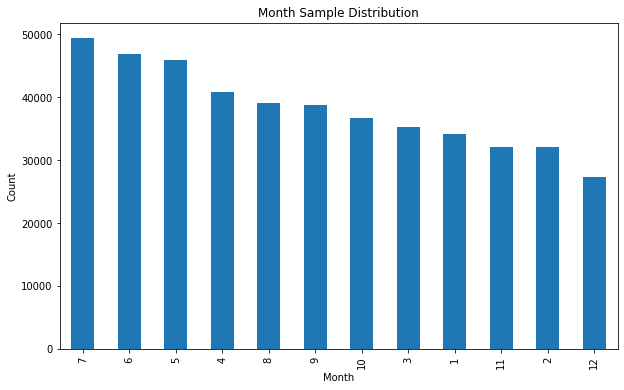

In [89]:
# how many shares per hour in total?
df['month'].value_counts().plot(kind='bar', figsize=(10,6))
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Month Sample Distribution')

In [90]:
from configs import weather_data_csv
import json
holidays = 'holidays.csv'
hol_df = pd.read_csv(holidays, index_col='date', parse_dates=['date'])
weather_df = pd.read_csv(weather_data_csv, index_col='timestamp', parse_dates=['timestamp'])
weather_df.head()

,temperature,feelsLike,wind,weatherCode
timestamp,,,,
2015-01-01 00:00:00,3,-2,21,116
2015-01-01 01:00:00,3,-2,21,116
2015-01-01 02:00:00,3,-1,20,116
2015-01-01 03:00:00,3,-1,20,116
2015-01-01 04:00:00,4,0,20,116


In [91]:
# check if the start date hits on a holiday
hol_set= set(hol_df.index.map(lambda x: x.date()))
df['is_holiday'] = df['Start Date'].map(lambda x: x.date() in hol_set).map(lambda x: '1' if x else '0')

# check if start date hits on a weekend
# monday is 0, sunday is 6
df['is_weekend'] = df['Start Date'].map(lambda x: x.weekday() > 4).map(lambda x: '1' if x else '0')

In [92]:
from datetime import datetime
date_mapper = lambda x: pd.to_datetime(datetime(year=x.year, month=x.month, day=x.day, hour=x.hour))
df['Start Date'] = df['Start Date'].map(date_mapper)

In [93]:
share_df = df.groupby('Start Date').agg({'Start Date': 'count'}).rename(columns={'Start Date': 'share_count'})
share_df.head()

,share_count
Start Date,
2015-01-02 00:00:00,1
2015-01-02 01:00:00,3
2015-01-02 02:00:00,1
2015-01-02 03:00:00,1
2015-01-02 10:00:00,11


In [94]:
share_df = share_df.join(weather_df)

In [95]:
print(share_df.shape)
share_df.head()

(35647, 5)


,share_count,temperature,feelsLike,wind,weatherCode
Start Date,,,,,
2015-01-02 00:00:00,1,10.0,7.0,35.0,122.0
2015-01-02 01:00:00,3,11.0,7.0,34.0,122.0
2015-01-02 02:00:00,1,11.0,8.0,32.0,122.0
2015-01-02 03:00:00,1,11.0,8.0,31.0,122.0
2015-01-02 10:00:00,11,7.0,3.0,21.0,116.0


ValueError: Could not interpret input 'hour'

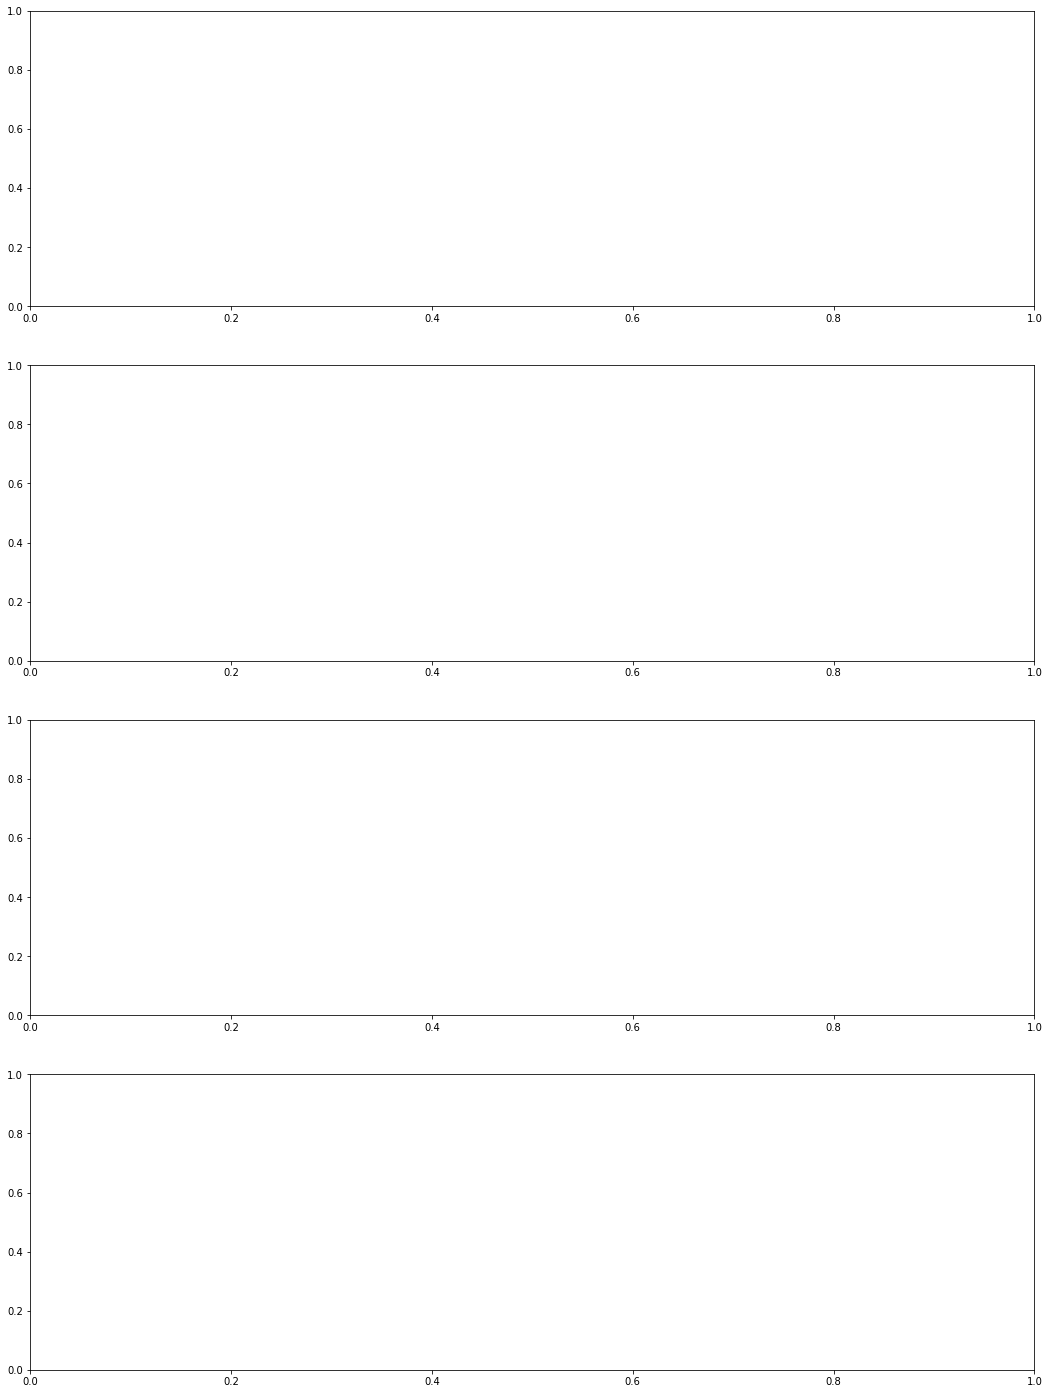

In [96]:
fig,(ax1, ax2, ax3, ax4, ax5)= plt.subplots(nrows=5)
fig.set_size_inches(18,25)

# sns.pointplot(data=data, x='hour', y='share_count', ax=ax1)
# sns.pointplot(data=data, x='hour', y='share_count', hue='is_holiday', ax=ax2)
# sns.pointplot(data=data, x='hour', y='share_count', hue='is_weekend', ax=ax3)
# sns.pointplot(data=data, x='hour', y='share_count', hue='season', ax=ax4)
# sns.pointplot(data=data, x='hour', y='share_count', hue='weather_code',ax=ax5)